In [1]:
import numpy as np
import random as rd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
'''
First Generating training set and testing set
'''
def generatingData(m_train, m_test, h0, h1, h2, fluc):
    '''
    We generating two sets of data for which y are linearly realted to x1 and x2 with fluctuation
    :param m_train: training set size
    :param m_test: testing set size
    :param h0: intersection
    :param h1: parameter h1
    :param h2: parameter h2
    :param fluc: fluctuation term
    :return: x1_train,x2_train,y_train,x1_test,x2_test,y_test
    '''
    x1_train = 10.*np.random.rand(m_train)
    x2_train = 10.*np.random.rand(m_train)
    delta_train = fluc*(np.random.rand(m_train) - 0.5)
    y_train = h0 + h1*x1_train + h2*x2_train + delta_train
    x1_test = 15.*np.random.rand(m_test)
    x2_test = 15.*np.random.rand(m_test)
    delta_test = fluc * (np.random.rand(m_test) - 0.5)
    y_test = h0 + h1 * x1_test + h2 * x2_test + delta_test
    return x1_train, x2_train, y_train, x1_test, x2_test, y_test

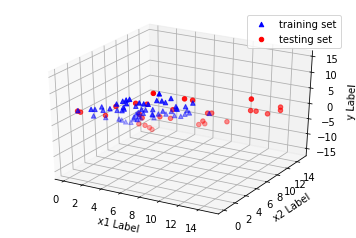

In [3]:
x1_train, x2_train, y_train, x1_test, x2_test, y_test = generatingData(60, 30, 5.0, 1.0, -1.5, 2.0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_train, x2_train, y_train, c='b', marker='^', label = "training set")
ax.scatter(x1_test, x2_test, y_test, c='r', marker='o', label = "testing set")

ax.set_xlabel('x1 Label')
ax.set_ylabel('x2 Label')
ax.set_zlabel('y Label')
ax.legend()

plt.show()

In [4]:
def gradDescent(x1, x2, y, l_rate, regulation, N_step, init_guess):
    '''
    We minimize the cost function using gradient descent
    :param x1: feature #1
    :param x2: feature #2
    :param y: output values
    :param l_rate: learning rate
    :param regulation: regularization factor
    :param N_step: Number of iterations
    :param init_guess: initial guess of the parameters
    :return: the fitted parameters
    '''
    h_vec = np.array(init_guess)
    m = len(x1)
    for n in range(N_step):
        h_tmp = h_vec
        for i in range(m):
            feature = np.array([1., x1[i], x2[i]])
            h_vec -= l_rate/m * (np.dot(h_tmp, feature) - y[i])*feature - l_rate/m * regulation * np.array([0., h_tmp[1], h_tmp[2]])
    return h_vec

parameters = gradDescent(x1_train, x2_train, y_train, 0.2, 0., 1000, [0., 0., 0.])
print(parameters)

[ 4.74802252  1.01639352 -1.46733897]


In [5]:
def computeDeviation(x1, x2, y, para):
    '''
    compute errors for training and testing
    :param x1: feature #1
    :param x2: feature #2
    :param y: output
    :param para: parameters
    :return: standard deviation
    '''
    x0 = np.array([1.]*len(x1))
    X = np.array([x0, x1, x2]).transpose()
    error = np.dot(X, para) - y
    return 1./len(x1) * np.dot(error, error)

test_error = computeDeviation(x1_test, x2_test, y_test, parameters)
train_error = computeDeviation(x1_train, x2_train, y_train, parameters)
print(test_error)
print(train_error)

0.478886866341
0.287611799429


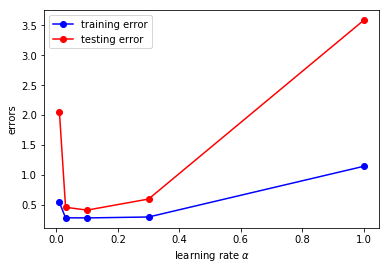

In [6]:
rate_list = [0.01, 0.03, 0.1, 0.3, 1.]
train_error = []
test_error = []
for r in rate_list:
    parameters = gradDescent(x1_train, x2_train, y_train, r, 0., 1000, [0., 0., 0.])
    train_error.append(computeDeviation(x1_train, x2_train, y_train, parameters))
    test_error.append(computeDeviation(x1_test, x2_test,y_test,parameters))

fig = plt.figure()
ax = fig.add_subplot(111)
line1 = ax.plot(rate_list, train_error, '-o', color='blue', label = 'training error')
line2 = ax.plot(rate_list, test_error, '-o', color='red', label = 'testing error')
ax.set_xlabel('learning rate $\\alpha$')
ax.set_ylabel('errors')
ax.legend()
plt.show()

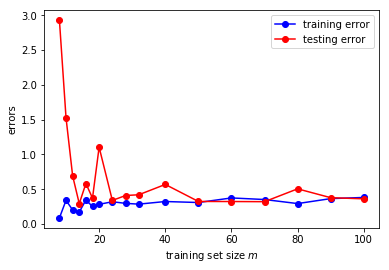

In [9]:
m_list = [8, 10, 12, 14, 16, 18 , 20, 24, 28, 32, 40, 50, 60, 70, 80, 90, 100]
train_error = []
test_error = []
for m in m_list:
    x1_train, x2_train, y_train, x1_test, x2_test, y_test = generatingData(m, 20, 5.0, 1.0, -1.5, 2.0)
    parameters = gradDescent(x1_train, x2_train, y_train, 0.05, 0., 1000, [0., 0., 0.])
    train_error.append(computeDeviation(x1_train, x2_train, y_train, parameters))
    test_error.append(computeDeviation(x1_test, x2_test, y_test, parameters))

fig = plt.figure()
ax = fig.add_subplot(111)
line3 = ax.plot(m_list, train_error, '-o', color='blue', label = 'training error')
line4 = ax.plot(m_list, test_error, '-o', color='red', label = 'testing error')
ax.set_xlabel('training set size $m$')
ax.set_ylabel('errors')
ax.legend()
plt.show()